In [ ]:
!pip install -U imbalanced-lear

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


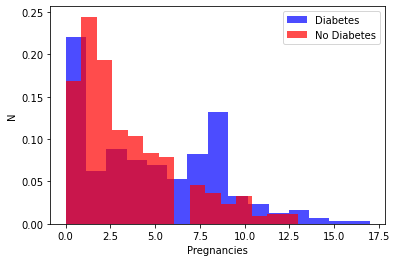

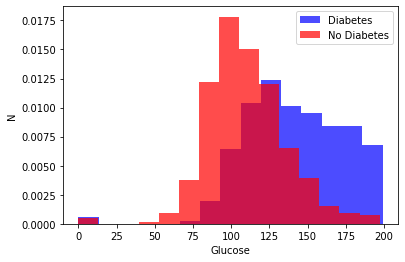

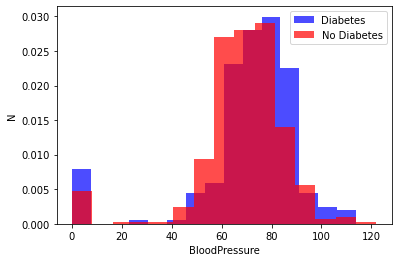

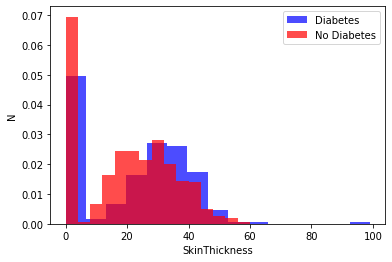

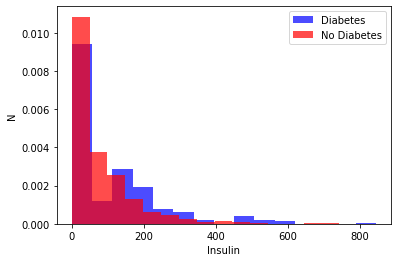

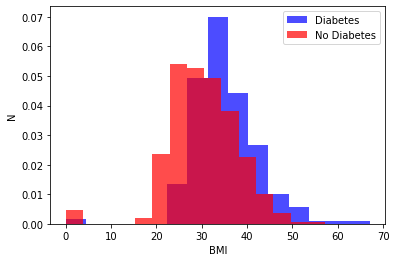

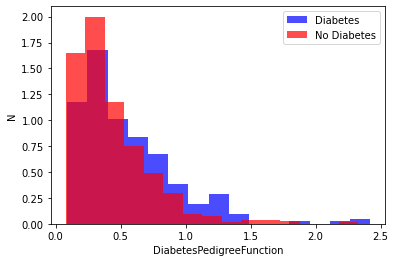

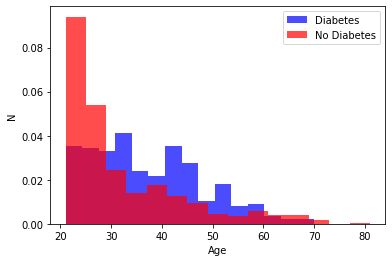

In [14]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.xlabel(label)
  plt.ylabel("N")
  plt.legend()
  plt.show()
  

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [16]:
X = df[df.columns[:-1]].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [21]:
y = df[df.columns[-1]].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [46]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [48]:
X.shape,y.shape

((768, 8), (768,))

In [64]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
data=np.hstack((X, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

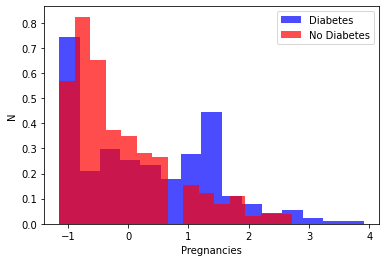

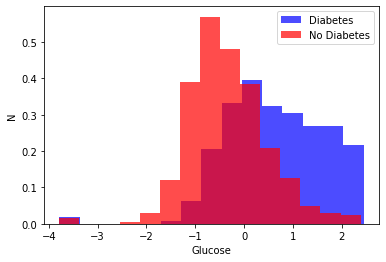

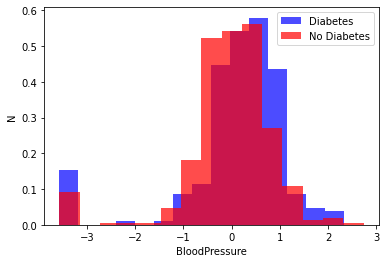

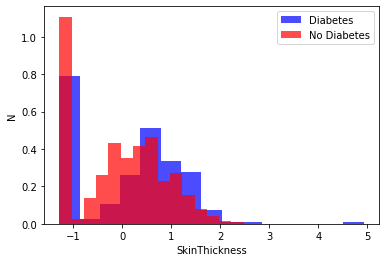

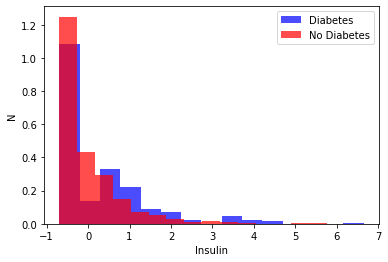

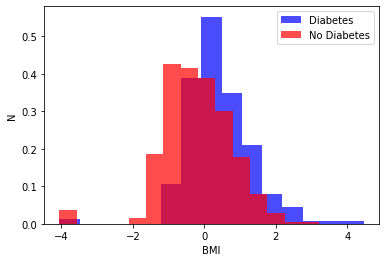

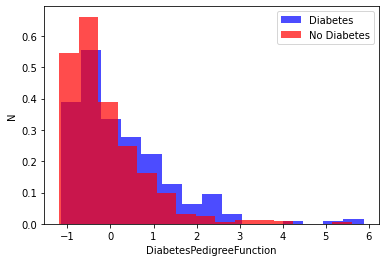

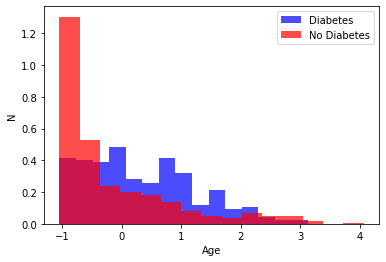

In [66]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue',label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.xlabel(label)
  plt.ylabel("N")
  plt.legend()
  plt.show()
  

In [59]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [50]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [69]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data=np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [70]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [72]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 0s 2ms/step - loss: 12.4852 - accuracy: 0.6413


[12.485152244567871, 0.6413043737411499]

In [73]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 10.2100 - accuracy: 0.6494


[10.210049629211426, 0.649350643157959]

In [75]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6500 - val_loss: 0.6453 - val_accuracy: 0.5844
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6630 - val_loss: 0.6189 - val_accuracy: 0.6429
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6783 - val_loss: 0.5937 - val_accuracy: 0.7078
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6652 - val_loss: 0.6064 - val_accuracy: 0.6558
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6739 - val_loss: 0.5929 - val_accuracy: 0.6558
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6652 - val_loss: 0.6106 - val_accuracy: 0.6883
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6870 - val_loss: 0.6116 - val_accuracy: 0.6234
Epoch 8/20
29/29 [==

In [76]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.7338


[0.5870879888534546, 0.7337662577629089]